# Übung: Clustering mit K-Means

**Ziel:**
In dieser Übung lernen Sie, den K-Means-Algorithmus für unüberwachtes Lernen anzuwenden. Sie laden einen Datensatz, erkunden ihn, standardisieren die Daten, bestimmen passende Cluster-Anzahlen, führen K-Means durch und visualisieren die Ergebnisse. Dabei experimentieren Sie mit Parametern und recherchieren online wichtige Metriken.

**Dauer:** ca. 30 Minuten

**Voraussetzungen:**
- Python-Grundkenntnisse
- scikit-learn, pandas, matplotlib, seaborn (optional), ggf. scikit‑learn-extra installiert


## 1. Problemstellung und Datensatz
Für viele reale Anwendungen (z. B. Kundensegmentierung, Bildkompression) ist es hilfreich, ähnliche Objekte in Gruppen zusammenzufassen. In dieser Übung nutzen wir dafür den **Wein-Datensatz** (Wine) aus scikit-learn.

**Aufgabe:**
1. Laden und erkunden Sie den Wine-Datensatz.
2. Standardisieren Sie die Features.
3. Bestimmen Sie mittels Elbow-Method und Silhouette-Analyse eine geeignete Anzahl von Clustern.
4. Führen Sie K-Means durch und interpretieren Sie Cluster-Zentren.
5. Visualisieren Sie die Cluster mithilfe von PCA auf 2 Komponenten.
6. Reflektieren Sie Einfluss von Parametern und recherchieren Sie online weitere Clustering-Verfahren.


## 2. Vorbereitung: Daten laden und erkunden

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Laden des Wine-Datensatzes
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Aufgabe 1:
- Nutzen Sie `df.info()` und `df.describe()`. Welche Eigenschaften hat der Datensatz?
- Wie groß ist jede Klasse (`value_counts()`)?

### Lösung Aufgabe 1:
...

## 3. Datenvorverarbeitung: Standardisierung


In [37]:
# %%
from sklearn.preprocessing import StandardScaler

# Features extrahieren und standardisieren
X = df[data.feature_names]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# In DataFrame zurück
df_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Aufgabe 2:
- Warum ist Standardisierung (z. B. `StandardScaler`) vor K-Means wichtig?
- Experimentieren Sie: Was ändert sich, wenn Sie nicht skalieren (beim späteren Erstellen der Cluster. Erst nach Aufgabe 8)?

### Lösung Aufgabe 2:
...

## 4. Elbow-Method: Wahl der Cluster-Anzahl
Beim K-Means-Clustering versucht man, Datenpunkte in k Gruppen zu unterteilen, sodass die Punkte innerhalb eines Clusters möglichst ähnlich sind. Dazu wird die sogenannte Inertia (auch Within-Cluster Sum of Squares, WCSS) berechnet.

Die Elbow-Methode hilft dabei, den Punkt zu finden, an dem das Hinzufügen weiterer Cluster keinen signifikanten Gewinn mehr bringt.

### Wie funktioniert sie?
1. Berechne die Inertia für verschiedene Werte von k (z.B. von 1 bis 10).

2. Trage die Inertia gegen k auf einem Diagramm auf.

3. Suche nach dem „Knick“ oder „Ellbogen“ in der Kurve – also dem Punkt, ab dem die Inertia nur noch langsam sinkt.

Dieser Knick markiert den optimalen Wert für k, da ab diesem Punkt zusätzliche Cluster nur noch geringe Verbesserungen bringen.


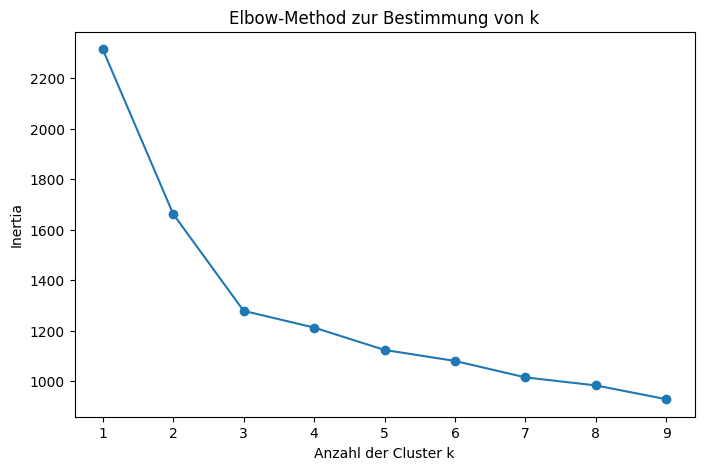

In [38]:
from sklearn.cluster import KMeans

inertia = []
ks = range(1, 10)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Elbow-Plot
plt.figure(figsize=(8,5))
plt.plot(ks, inertia, '-o')
plt.xlabel('Anzahl der Cluster k')
plt.ylabel('Inertia')
plt.title('Elbow-Method zur Bestimmung von k')
plt.show()

### Aufgabe 3:
- Interpretieren Sie den Elbow-Plot. Wo erkennen Sie ggf. einen Knick („Elbow“)?
- Recherchieren Sie online: Was misst die Inertia genau und welche Limitationen hat sie?

### Lösung Aufgabe 3:
...

## 5. Silhouette-Analyse zur Validierung
Der Silhouette-Score misst, wie ähnlich ein Datenpunkt seiner eigenen Clustergruppe im Vergleich zu anderen Clustern ist.

### Wie wird die Silhouette-Analyse angewendet?
1. Clusterbildung: Führen Sie K-Means-Clustering für verschiedene Werte von k (Anzahl der Cluster) durch.

2. Berechnung des Silhouette-Scores: Für jeden k-Wert berechnen Sie den durchschnittlichen Silhouette-Score über alle Datenpunkte.

3. Visualisierung: Erstellen Sie ein Diagramm der Silhouette-Scores gegen die Anzahl der Cluster.

4. Bestimmung des optimalen k: Wählen Sie den k-Wert mit dem höchsten durchschnittlichen Silhouette-Score als optimale Anzahl von Clustern.


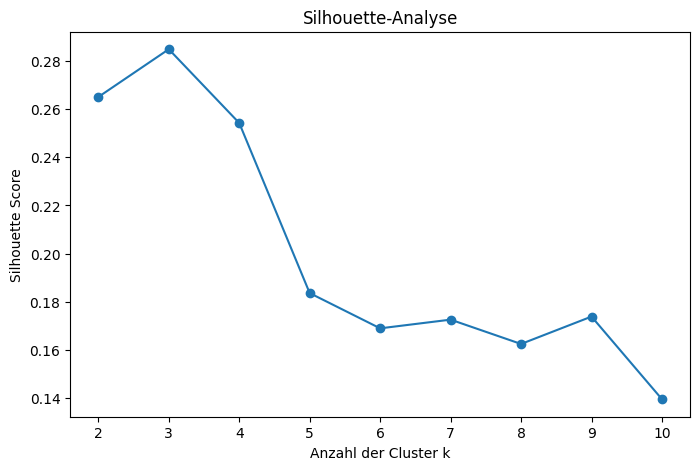

In [39]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Silhouette-Plot
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_scores, '-o')
plt.xlabel('Anzahl der Cluster k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette-Analyse')
plt.show()

### Aufgabe 4:
- Welchen k-Wert würden Sie aufgrund des Silhouette-Scores wählen?
- Recherchieren Sie: Wie wird der Silhouette-Score berechnet und was sagt er über die Cluster-Struktur aus?


### Lösung Aufgabe 4:
...

## 6. K-Means mit gewähltem k und Interpretation


In [40]:
# Beispiel: k aus vorheriger Analyse
chosen_k = 3
km = KMeans(n_clusters=chosen_k, random_state=42)
labels = km.fit_predict(X_scaled)

df['cluster'] = labels

# Cluster-Zentren (auf Originaldaten zurücktransformiert)
centers = scaler.inverse_transform(km.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=data.feature_names)

print("Cluster-Zentren (ursprüngliche Skala):")
print(centers_df)

Cluster-Zentren (ursprüngliche Skala):
     alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
0  12.250923    1.897385  2.231231          20.063077   92.738462   
1  13.134118    3.307255  2.417647          21.241176   98.666667   
2  13.676774    1.997903  2.466290          17.462903  107.967742   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       2.247692    2.050000              0.357692         1.624154   
1       1.683922    0.818824              0.451961         1.145882   
2       2.847581    3.003226              0.292097         1.922097   

   color_intensity       hue  od280/od315_of_diluted_wines      proline  
0         2.973077  1.062708                      2.803385   510.169231  
1         7.234706  0.691961                      1.696667   619.058824  
2         5.453548  1.065484                      3.163387  1100.225806  


### Aufgabe 5:
- Interpretieren Sie die Cluster-Zentren. Welche Merkmale unterscheiden die Cluster am stärksten?
- Experiment: Ändern Sie `n_init` oder `max_iter` (Attribute von `KMeans`). Was beobachten Sie?

### Lösung Aufgabe 5:
...

## 7. Visualisierung mit PCA


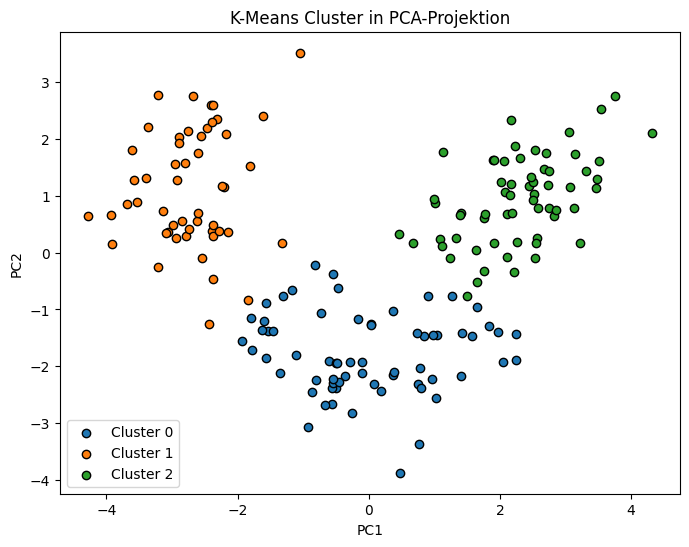

In [41]:
from sklearn.decomposition import PCA

# PCA auf 2 Komponenten
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatterplot
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['cluster'] = labels

plt.figure(figsize=(8,6))
for c in range(chosen_k):
    subset = df_plot[df_plot['cluster'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {c}', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Cluster in PCA-Projektion')
plt.legend()
plt.show()

### Aufgabe 6:
- Interpretieren Sie die Verteilung in der PCA-Projektion. Sind die Cluster klar separiert?

### Lösung Aufgabe 6:
...


## 8. Berechnung von Accuracy, Precision und Recall
Obwohl Clustering unüberwacht ist, können wir die gefundenen Cluster mit den echten Labels vergleichen und klassifikationsmetrische Auswertungen durchführen.



In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Mapping von Cluster zu Label mittels Mehrheitsentscheidung
label_mapping = {}
for cluster in np.unique(labels):
    mask = labels == cluster
    true_labels = df.loc[mask, 'target']
    most_common = true_labels.mode()[0]
    label_mapping[cluster] = most_common

# Vorhergesagte Labels anhand des Mapping
predicted_labels = np.array([label_mapping[c] for c in labels])

# Metriken berechnen
acc = accuracy_score(df['target'], predicted_labels)
prec = precision_score(df['target'], predicted_labels, average='weighted')
rec = recall_score(df['target'], predicted_labels, average='weighted')
print(f"Accuracy: {acc:.3f}")
print(f"Precision (gewichtet): {prec:.3f}")
print(f"Recall (gewichtet): {rec:.3f}")

Accuracy: 0.966
Precision (gewichtet): 0.968
Recall (gewichtet): 0.966
